In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannot import add_stat_annotation
from adjustText import adjust_text

anot = pd.read_csv('aneuploidy_data_NEW.csv',index_col=0)

anot_CCLE = anot.copy()
anot_CCLE.index = anot_CCLE.loc[:,'CCLE_ID']

from cds import plotting

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
my_order = order=['Diploid','Aneuploid']

from taigapy import TaigaClient
tc = TaigaClient()

gene_effect_rnai_achilles = tc.get(name='demeter2-achilles-5386', version=13, file='gene_effect')
gene_effect_rnai_drive = tc.get(name='demeter2-drive-0591', version=12, file='gene_effect')
gene_effect_crispr_achilles = tc.get(name='avana-public-tentative-19q4-c2df', version=4, file='gene_effect')


6

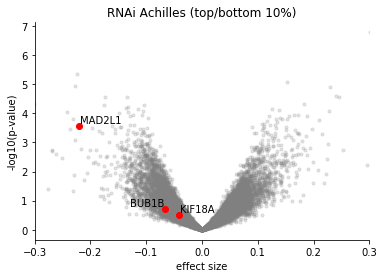

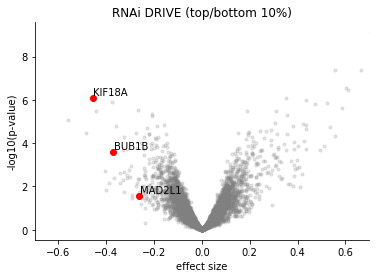

In [6]:
###############################################################
##################### volcano plots 10% #######################
###############################################################

drive = pd.read_csv('10%/lim_res_rnai_drvie_10_percent_NEW.csv',index_col=0)
rnai = pd.read_csv('10%/lim_res_rnai_achilles_10_percent_NEW.csv',index_col=0)

from adjustText import adjust_text
from cds import plotting 

fix,ax = plt.subplots()
plt.scatter(rnai.loc[:,'EffectSize'],-np.log10(rnai.loc[:,'p.value']),alpha=.2,color='gray',s=10)
plt.scatter(rnai.loc['BUB1B (701)','EffectSize'],-np.log10(rnai.loc['BUB1B (701)','p.value']),color='red')
plt.scatter(rnai.loc['MAD2L1 (4085)','EffectSize'],-np.log10(rnai.loc['MAD2L1 (4085)','p.value']),color='red')
plt.scatter(rnai.loc['KIF18A (81930)','EffectSize'],-np.log10(rnai.loc['KIF18A (81930)','p.value']),color='red')


#plt.scatter(rnai.loc['KIF18A (81930)','EffectSize'],-np.log10(rnai.loc['KIF18A (81930)','p.value']),color='red')


plt.xlim(-.3,.3)
plt.xlabel('effect size')
plt.ylabel('-log10(p-value)')
plt.title('RNAi Achilles (top/bottom 10%)')
plotting.simpleaxis(ax)

texts = []
for txt in sorted(['BUB1B (701)','MAD2L1 (4085)','KIF18A (81930)']):#,'KIF18A (81930)']):
    texts.append(plt.text(rnai.loc[txt,'EffectSize'], -np.log10(rnai.loc[txt,'p.value']),txt.split(' ')[0],color='black'))
adjust_text(texts)
# plt.savefig('review_plots/rnai_achilles_10_percent_fid18a_NEW.png')




fix,ax = plt.subplots()
plt.scatter(drive.loc[:,'EffectSize'],-np.log10(drive.loc[:,'p.value']),alpha=.2,color='gray',s=10)
plt.scatter(drive.loc['BUB1B (701)','EffectSize'],-np.log10(drive.loc['BUB1B (701)','p.value']),color='red')
plt.scatter(drive.loc['MAD2L1 (4085)','EffectSize'],-np.log10(drive.loc['MAD2L1 (4085)','p.value']),color='red')
plt.scatter(drive.loc['KIF18A (81930)','EffectSize'],-np.log10(drive.loc['KIF18A (81930)','p.value']),color='red')


plt.xlim(-.7,.7)
plt.xlabel('effect size')
plt.ylabel('-log10(p-value)')
plt.title('RNAi DRIVE (top/bottom 10%)')
plotting.simpleaxis(ax)


texts = []
for txt in sorted(['BUB1B (701)','MAD2L1 (4085)','KIF18A (81930)']):
    texts.append(plt.text(drive.loc[txt,'EffectSize'], -np.log10(drive.loc[txt,'p.value']),txt.split(' ')[0],color='black'))
adjust_text(texts)
# plt.savefig('review_plots/rnai_drive_10_percent_kif18a_NEW.png')



/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi Achilles p-value for BUB1B: 0.2131468288821822
RNAi Achilles p-value for MAD2L1: 0.0006020573894738556
RNAi Achilles p-value for KIF18A: 0.28885295414718043


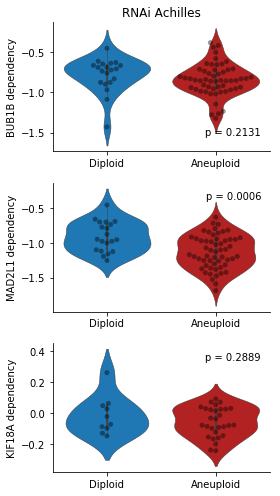

In [8]:
###############################################################
##################### violin plots 10% ########################
###############################################################

from scipy import stats


anot = tc.get(name='aneuploidy-data-d0b9', version=19, file='using_ten_percent_NEW')#pd.read_csv('aneuploidy_data_compact.csv',index_col=0)
fig,axx = plt.subplots(3,1,figsize=(4,7))
genes = ['BUB1B (701)','MAD2L1 (4085)','KIF18A (81930)']
gene_effect_rnai_drive_ = gene_effect_rnai_drive.loc[:,genes]
gene_effect_rnai_achilles_ = gene_effect_rnai_achilles.loc[:,genes]


shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_achilles_.index)
temp = gene_effect_rnai_achilles_.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('RNAi Achilles')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi Achilles')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])



sns.violinplot(y = 'KIF18A (81930)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[2],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'KIF18A (81930)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[2],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi Achilles')
axx[2].set_ylabel('KIF18A dependency')
axx[2].set_xlabel('')

plotting.simpleaxis(axx[2])



plt.tight_layout()


tt,p_val = stats.ttest_ind(gene_effect_rnai_achilles_.loc[trus,'BUB1B (701)'],gene_effect_rnai_achilles_.loc[falsee,'BUB1B (701)'])
print('RNAi Achilles p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,4)),frameon=False)
tt,p_val = stats.ttest_ind(gene_effect_rnai_achilles_.loc[trus,'MAD2L1 (4085)'],gene_effect_rnai_achilles_.loc[falsee,'MAD2L1 (4085)'])
print('RNAi Achilles p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,4)),frameon=False)
tt,p_val = stats.ttest_ind(gene_effect_rnai_achilles_.loc[trus,'KIF18A (81930)'].dropna(),gene_effect_rnai_achilles_.loc[falsee,'KIF18A (81930)'].dropna())
print('RNAi Achilles p-value for KIF18A: ' + str(p_val))
axx[2].legend(title='p = '+ str(round(p_val,4)),frameon=False)




# plt.savefig('review_plots/rnai_achilles_10_percent_NEW.pdf')


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi drive p-value for BUB1B: 0.000488779247222443
RNAi drive p-value for MAD2L1: 0.037339850782972576
RNAi drive p-value for KIF18A: 2.5201353007111625e-06


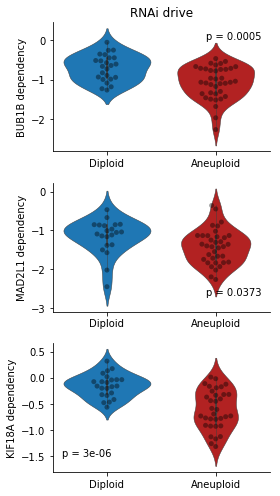

In [10]:
fig,axx = plt.subplots(3,1,figsize=(4,7))

from scipy import stats

shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_drive_.index)
temp = gene_effect_rnai_drive_.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('RNAi drive')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi drive')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])



sns.violinplot(y = 'KIF18A (81930)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[2],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'KIF18A (81930)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[2],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi drive')
axx[2].set_ylabel('KIF18A dependency')
axx[2].set_xlabel('')

plotting.simpleaxis(axx[2])



plt.tight_layout()


tt,p_val = stats.ttest_ind(gene_effect_rnai_drive_.loc[trus,'BUB1B (701)'],gene_effect_rnai_drive_.loc[falsee,'BUB1B (701)'])
print('RNAi drive p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,4)),frameon=False)
tt,p_val = stats.ttest_ind(gene_effect_rnai_drive_.loc[trus,'MAD2L1 (4085)'].dropna(),gene_effect_rnai_drive_.loc[falsee,'MAD2L1 (4085)'].dropna())
print('RNAi drive p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,4)),frameon=False)
tt,p_val = stats.ttest_ind(gene_effect_rnai_drive_.loc[trus,'KIF18A (81930)'].dropna(),gene_effect_rnai_drive_.loc[falsee,'KIF18A (81930)'].dropna())
print('RNAi drive p-value for KIF18A: ' + str(p_val))
axx[2].legend(title='p = '+ str(round(p_val,6)),frameon=False,loc='lower left')




# plt.savefig('review_plots/rnai_drive_10_percent_NEW.pdf')


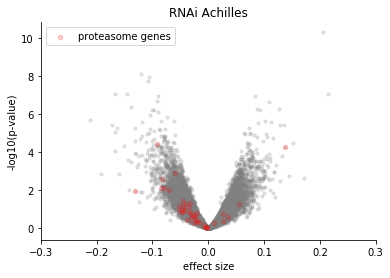

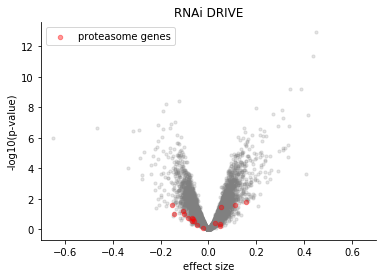

In [12]:
###############################################################
##################### proteasome ##############################
###############################################################

# highlight proteasome genes on limma res plots


drive = pd.read_csv('Limma/lim_res_rnai_drive_NEW.csv',index_col=0)
rnai = pd.read_csv('Limma/lim_res_rnai_achilles_NEW.csv',index_col=0)
# get proteasome genes
proteos = pd.read_table('geneset (1).txt',header=1).values[:,0]

drive.index = drive.index.str.split(' ').str[0]
rnai.index = rnai.index.str.split(' ').str[0]

from adjustText import adjust_text
fix,ax = plt.subplots()
proteos_ = set(proteos) & set(rnai.index)
plt.scatter(rnai.loc[:,'EffectSize'],-np.log10(rnai.loc[:,'p.value']),alpha=.2,color='gray',s=10,label=None)
plt.scatter(rnai.loc[proteos_,'EffectSize'],-np.log10(rnai.loc[proteos_,'p.value']),alpha=.2,color='red',s=20,label='proteasome genes')


# plt.scatter(rnai.loc['BUB1B (701)','EffectSize'],-np.log10(rnai.loc['BUB1B (701)','p.value']),color='red')
# plt.scatter(rnai.loc['MAD2L1 (4085)','EffectSize'],-np.log10(rnai.loc['MAD2L1 (4085)','p.value']),color='red')
#plt.scatter(rnai.loc['KIF18A (81930)','EffectSize'],-np.log10(rnai.loc['KIF18A (81930)','p.value']),color='red')


plt.xlim(-.3,.3)
plt.xlabel('effect size')
plt.ylabel('-log10(p-value)')
plt.title('RNAi Achilles')
plotting.simpleaxis(ax)
plt.legend()



fix,ax = plt.subplots()
proteos_ = set(proteos) & set(drive.index)

plt.scatter(drive.loc[:,'EffectSize'],-np.log10(drive.loc[:,'p.value']),alpha=.2,color='gray',s=10,label=None)
plt.scatter(drive.loc[proteos_,'EffectSize'],-np.log10(drive.loc[proteos_,'p.value']),alpha=.4,color='red',s=20,label='proteasome genes')


# plt.scatter(drive.loc['BUB1B (701)','EffectSize'],-np.log10(drive.loc['BUB1B (701)','p.value']),color='red')
# plt.scatter(drive.loc['MAD2L1 (4085)','EffectSize'],-np.log10(drive.loc['MAD2L1 (4085)','p.value']),color='red')
#plt.scatter(drive.loc['KIF18A (81930)','EffectSize'],-np.log10(drive.loc['KIF18A (81930)','p.value']),color='red')


plt.xlim(-.7,.7)
plt.xlabel('effect size')
plt.ylabel('-log10(p-value)')
plt.title('RNAi DRIVE')
plotting.simpleaxis(ax)
plt.legend()





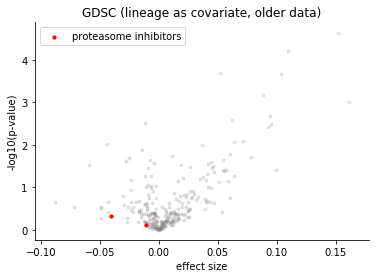

In [14]:
###############################################################
##################### proteasome ##############################
###############################################################

# highlight proteasome genes on limma res plots for drug data


# note that this limma run was done using an older version of GDSC
GDSC = pd.read_csv('old_GDSC_data/GDSC_lineage_as_covariate_OLD_DATA_REVISION_NEW.csv',index_col=0)
# our proteasome inhibitors
gdscs_2 = ['Bortezomib (104)','MG-132 (9)' ]


fix,ax = plt.subplots()#figsize=(3,4))
plt.scatter(GDSC.loc[:,'EffectSize'],-np.log10(GDSC.loc[:,'p.value']),alpha=.2,color='gray',s=8,label=None)
plt.scatter(GDSC.loc[gdscs_2,'EffectSize'],-np.log10(GDSC.loc[gdscs_2,'p.value']),alpha=1,color='red',s=10,label='proteasome inhibitors')

#plt.xlim(-1.3,1.3)
plt.xlabel('effect size')
plt.ylabel('-log10(p-value)')
plt.title('GDSC (lineage as covariate, older data)')
plotting.simpleaxis(ax)
plt.legend()



/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


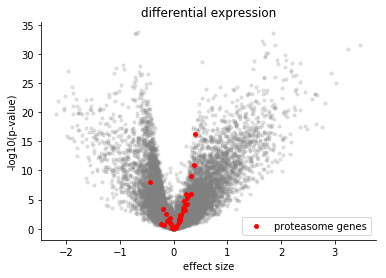

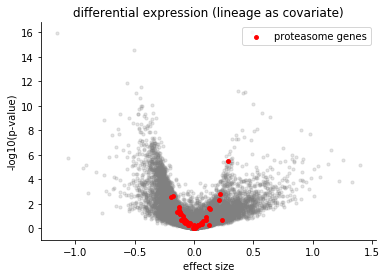

In [17]:
###############################################################
##################### proteasome ##############################
###############################################################

# looking at differential expression data

diff_exp = pd.read_csv('differential_expression/differential_expression_NEW.csv',index_col=0)

diff_exp.index = diff_exp.index.str.split(' ').str[0]


fix,ax = plt.subplots()
plt.scatter(diff_exp.loc[:,'EffectSize'],-np.log10(diff_exp.loc[:,'p.value']),alpha=.2,color='gray',s=10,label=None)
plt.scatter(diff_exp.loc[proteos,'EffectSize'],-np.log10(diff_exp.loc[proteos,'p.value']),alpha=1,color='red',s=15,label='proteasome genes')

#plt.xlim(-1.3,1.3)
plt.xlabel('effect size')
plt.ylabel('-log10(p-value)')
plt.title('differential expression')
plotting.simpleaxis(ax)

plt.legend()



diff_exp = pd.read_csv('differential_expression/differential_expression_lineage_controlled_NEW.csv',index_col=0)

diff_exp.index = diff_exp.index.str.split(' ').str[0]

fix,ax = plt.subplots()
plt.scatter(diff_exp.loc[:,'EffectSize'],-np.log10(diff_exp.loc[:,'p.value']),alpha=.2,color='gray',s=10,label=None)
plt.scatter(diff_exp.loc[proteos,'EffectSize'],-np.log10(diff_exp.loc[proteos,'p.value']),alpha=1,color='red',s=15,label='proteasome genes')

#plt.xlim(-1.3,1.3)
plt.xlabel('effect size')
plt.ylabel('-log10(p-value)')
plt.title('differential expression (lineage as covariate)')
plotting.simpleaxis(ax)

plt.legend()



/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


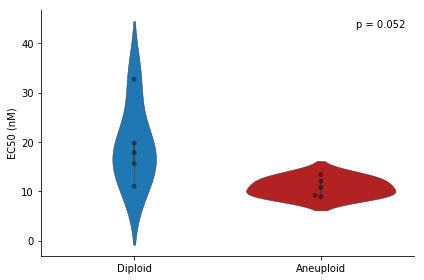

In [18]:
###############################################################
##################### ec50 plot ###############################
###############################################################

ec50 = pd.read_csv('10CL_EC50_for_boxplot_by_PRISM.csv',index_col=1)

prism_ec50 = pd.read_table('Bort_file_for_boxplot_r2_threshold_0.1.txt',index_col=0)

ec50[ec50.loc[:,'Unnamed: 0'] == 'Aneuploid'].loc[:,'EC50 (nM)']
fig,ax = plt.subplots()
sns.violinplot(data=ec50,x='Unnamed: 0',y='EC50 (nM)',saturation=1,linewidth=.5,order=my_order,palette = my_pal)
sns.swarmplot(data=ec50,x='Unnamed: 0',y='EC50 (nM)',color='black',alpha=.4,order=my_order)


plt.xlabel('')

plotting.simpleaxis()



tt,p_val = stats.ttest_ind(ec50[ec50.loc[:,'Unnamed: 0'] == 'Aneuploid'].loc[:,'EC50 (nM)'],ec50[ec50.loc[:,'Unnamed: 0'] == 'Diploid'].loc[:,'EC50 (nM)'])
ax.legend(title='p = '+ str(round(p_val,3)),frameon=False)

plotting.simpleaxis()
plt.tight_layout()


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


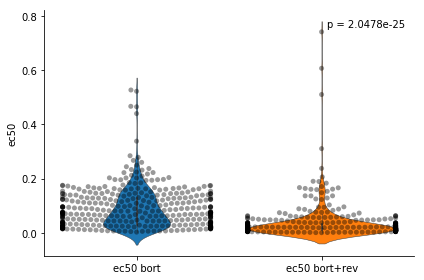

In [19]:
###############################################################
##################### ec50 plot ###############################
###############################################################

bort = pd.read_csv('uri_combo_screen_curve_fits_bortezomib.csv',index_col=0)

bort_2 = bort.drop(['Aneuploidy_status'],axis=1).melt()

from scipy import stats
fig,ax = plt.subplots()
sns.violinplot(data=bort_2,x='variable',y='value',saturation=1,linewidth=.5)#,order=my_order,palette = my_pal)
sns.swarmplot(data=bort_2,x='variable',y='value',color='black',alpha=.4)#,order=my_order)


plt.xlabel('')

plotting.simpleaxis()



tt,p_val = stats.ttest_ind(bort_2[bort_2.loc[:,'variable'] == 'ec50 bort'].loc[:,'value'].dropna(),bort_2[bort_2.loc[:,'variable'] == 'ec50 bort+rev'].loc[:,'value'].dropna())
ax.legend(title='p = '+ str(round(p_val,29)),frameon=False)
plt.ylabel('ec50')

plotting.simpleaxis()
plt.tight_layout()
